In [1]:
import pickle
import pandas as pd
import geopandas as gpd
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import contextily as cx

#display
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import folium
plt.rcParams["figure.figsize"] = (20,15)
from IPython.display import clear_output
import contextily as cx

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.bibliotheque as bb

import sys
sys.path.append("../")
import src.supportCharts as sch

# hotels data input

In [2]:
with open('../data/ayto_madrid/ayto_madrid_hotels.pickle', 'rb') as df_hoteles:
    df_hoteles = pickle.load(df_hoteles)
print(df_hoteles.shape)
df_hoteles.head(1)

(611, 24)


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt
0,2023-04-12,101557,es,JW Marriott Madrid,None,+34 914 18 97 70,None,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Sevilla, 2",28014,Madrid,Spain,40.416801800000,-3.700126000000,Madrid,None,3,Alojamientos,7022,Hoteles,7027,5 estrellas


In [3]:
df_hoteles['cod2_txt_en'] = df_hoteles['cod2_txt'].replace(bb.accommodation_type)
df_hoteles['cod1_txt_en'] = df_hoteles['cod1_txt'].replace(bb.accommodation)
df_hoteles['cod3_txt_en'] = df_hoteles['cod3_txt'].replace(bb.hotel_apartments_ratings)
df_hoteles[['cod1_txt_en', 'cod2_txt_en', 'cod3_txt_en']].value_counts()

cod1_txt_en    cod2_txt_en  cod3_txt_en
Accommodation  Hotels       4.0            163
               Hostel       2.0            107
               Hotels       3.0             70
               Hostel       1.0             47
                            3.0             39
               Hotels       5.0             25
                            2.0             20
               Apartments   3.0             17
               Hotels       6.0             13
               Hostels      1.0             10
               Apartments   1.0              5
                            2.0              4
                            4.0              4
               Hotels       1.0              3
               Hostels      2.0              2
               Camping      3.0              1
dtype: int64

In [4]:
print(df_hoteles.shape)
df_hoteles.head(1)

(611, 27)


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt,cod2_txt_en,cod1_txt_en,cod3_txt_en
0,2023-04-12,101557,es,JW Marriott Madrid,None,+34 914 18 97 70,None,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Sevilla, 2",28014,Madrid,Spain,40.416801800000,-3.700126000000,Madrid,None,3,Alojamientos,7022,Hoteles,7027,5 estrellas,Hotels,Accommodation,5.0


In [5]:
df_hoteles.dtypes

@fechaActualizacion       object
@id                       object
language                  object
name                      object
email                     object
phone                     object
fax                       object
title                     object
body                      object
web                       object
address                   object
zipcode                   object
locality                  object
country                   object
latitude                  object
longitude                 object
subAdministrativeArea     object
fechas                    object
cod1_num                  object
cod1_txt                  object
cod2_num                  object
cod2_txt                  object
cod3_num                  object
cod3_txt                  object
cod2_txt_en               object
cod1_txt_en               object
cod3_txt_en              float64
dtype: object

try to convert the numeric fields to int or float -> correct datatypes

In [6]:
df_hoteles = sc.convertColumnsToNumeric(df_hoteles)

In [7]:
df_hoteles.dtypes

@fechaActualizacion       object
@id                        int64
language                  object
name                      object
email                     object
phone                     object
fax                      float64
title                     object
body                      object
web                       object
address                   object
zipcode                    int64
locality                  object
country                   object
latitude                 float64
longitude                float64
subAdministrativeArea     object
fechas                   float64
cod1_num                   int64
cod1_txt                  object
cod2_num                 float64
cod2_txt                  object
cod3_num                 float64
cod3_txt                  object
cod2_txt_en               object
cod1_txt_en               object
cod3_txt_en              float64
dtype: object

## EDA

In [8]:
map1 = folium.Map(
    location=[40.41694, -3.70361],
    tiles='cartodbpositron',
    zoom_start=12,
)
df_hoteles[df_hoteles['latitude'].isnull() == False].apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

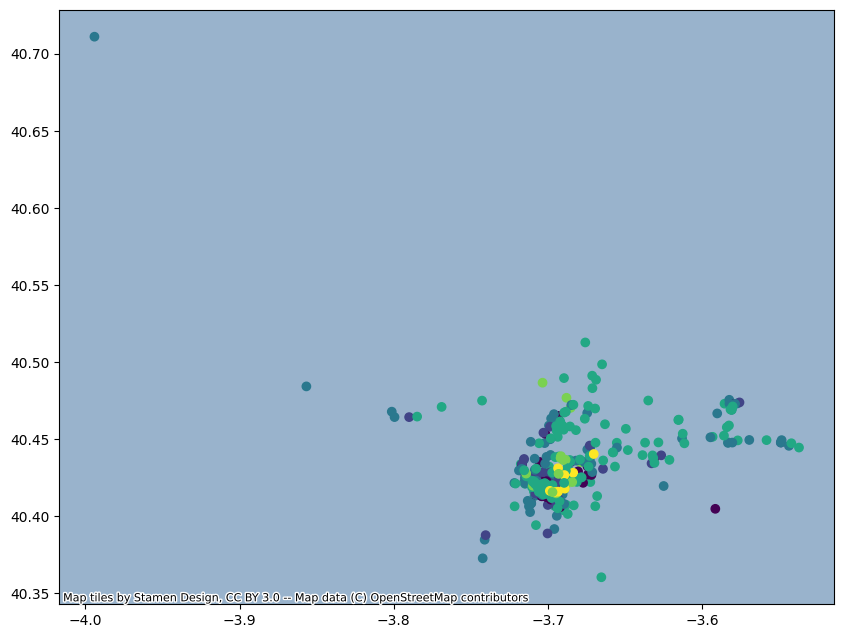

In [9]:
gdf_hoteles = gpd.GeoDataFrame(df_hoteles, geometry=gpd.points_from_xy(df_hoteles.longitude, df_hoteles.latitude)).set_crs('epsg:4326')
ax = gdf_hoteles.to_crs(epsg=4326).plot(column='cod3_txt_en', cmap=None)
cx.add_basemap(ax)

In [10]:
sch.analisis_basico(df_hoteles)

_________________________________

1_Data Structure: (611, 28)


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt,cod2_txt_en,cod1_txt_en,cod3_txt_en,geometry
0,2023-04-12,101557,es,JW Marriott Madrid,None,+34 914 18 97 70,NaN,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Sevilla, 2",28014,Madrid,Spain,40.416802,-3.700126,Madrid,NaN,3,Alojamientos,7022.0,Hoteles,7027.0,5 estrellas,Hotels,Accommodation,5.0,POINT (-3.70013 40.41680)
1,2023-01-31,100999,es,UMusic Hotel Madrid,Socialmedia@umusic-hotels.com,+34 911 231 099,NaN,UMusic Hotel Madrid,"<p><strong>En pleno centro de Madrid, en la ca...",https://www.esmadrid.com/alojamientos/umusic-h...,"La Paz, 11,",28012,Madrid,Spain,40.415345,-3.704102,Madrid,NaN,3,Alojamientos,7022.0,Hoteles,7027.0,5 estrellas,Hotels,Accommodation,5.0,POINT (-3.70410 40.41534)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   @fechaActualizacion    611 non-null    object  
 1   @id                    611 non-null    int64   
 2   language               611 non-null    object  
 3   name                   611 non-null    object  
 4   email                  571 non-null    object  
 5   phone                  609 non-null    object  
 6   fax                    0 non-null      float64 
 7   title                  611 non-null    object  
 8   body                   611 non-null    object  
 9   web                    611 non-null    object  
 10  address                611 non-null    object  
 11  zipcode                611 non-null    int64   
 12  locality               77 non-null     object  
 13  country                611 non-null    object  
 14  latitude               611 non-null    flo

None

_________________________________

2_Duplicated columns:
0
_________________________________

3_Null values distribution:


,@fechaActualizacion,@id,language,name,email,phone,fax,title,body,web,address,zipcode,locality,country,latitude,longitude,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt,cod2_txt_en,cod1_txt_en,cod3_txt_en,geometry
nulos,0,0,0,0,40,2,611,0,0,0,0,0,534,0,0,0,0,611,0,0,4,4,81,81,4,0,81,0
dtypes,object,int64,object,object,object,object,float64,object,object,object,object,int64,object,object,float64,float64,object,float64,int64,object,float64,object,float64,object,object,object,float64,geometry


_________________________________

4_Numerical variables distribution:


,@id,fax,zipcode,latitude,longitude,fechas,cod1_num,cod2_num,cod3_num,cod3_txt_en
count,611.000000,0.0,611.000000,611.000000,611.000000,0.0,611.0,607.000000,530.000000,530.000000
mean,69552.134206,NaN,28020.348609,40.428622,-3.693460,NaN,3.0,7028.477759,7028.947170,2.986792
std,6879.932067,NaN,47.363553,0.031863,0.039907,NaN,0.0,8.344822,4.760129,1.211872
min,67176.000000,NaN,28001.000000,39.938723,-3.994158,NaN,3.0,7022.000000,7023.000000,1.000000
25%,67371.500000,NaN,28008.000000,40.416487,-3.706405,NaN,3.0,7022.000000,7026.000000,2.000000
50%,67537.000000,NaN,28013.000000,40.421948,-3.700353,NaN,3.0,7029.000000,7027.000000,3.000000
75%,67745.500000,NaN,28020.000000,40.438461,-3.691186,NaN,3.0,7029.000000,7031.000000,4.000000
max,101557.000000,NaN,28906.000000,40.710999,-3.537065,NaN,3.0,7047.000000,7046.000000,6.000000


_________________________________

5_Categorical variables distribution:


,@fechaActualizacion,language,name,email,phone,title,body,web,address,locality,country,subAdministrativeArea,cod1_txt,cod2_txt,cod3_txt,cod2_txt_en,cod1_txt_en
count,611,611,611,571,609,611,611,611,611,77,611,611,611,607,530,607,611
unique,167,1,611,566,605,611,611,611,608,5,1,6,1,7,11,6,1
top,2023-01-20,es,JW Marriott Madrid,guest@pestana.com,(+34)91 724 76 00,JW Marriott Madrid,<p><strong>Ubicado junto a la Plaza de Canalej...,https://www.esmadrid.com/alojamientos/jw-marri...,"Juan XXIII, 3",Madrid,Spain,Madrid,Alojamientos,Hoteles,4 estrellas,Hotels,Accommodation
freq,22,611,1,2,2,1,1,1,2,73,611,605,611,294,163,294,611


numeric variables distribution


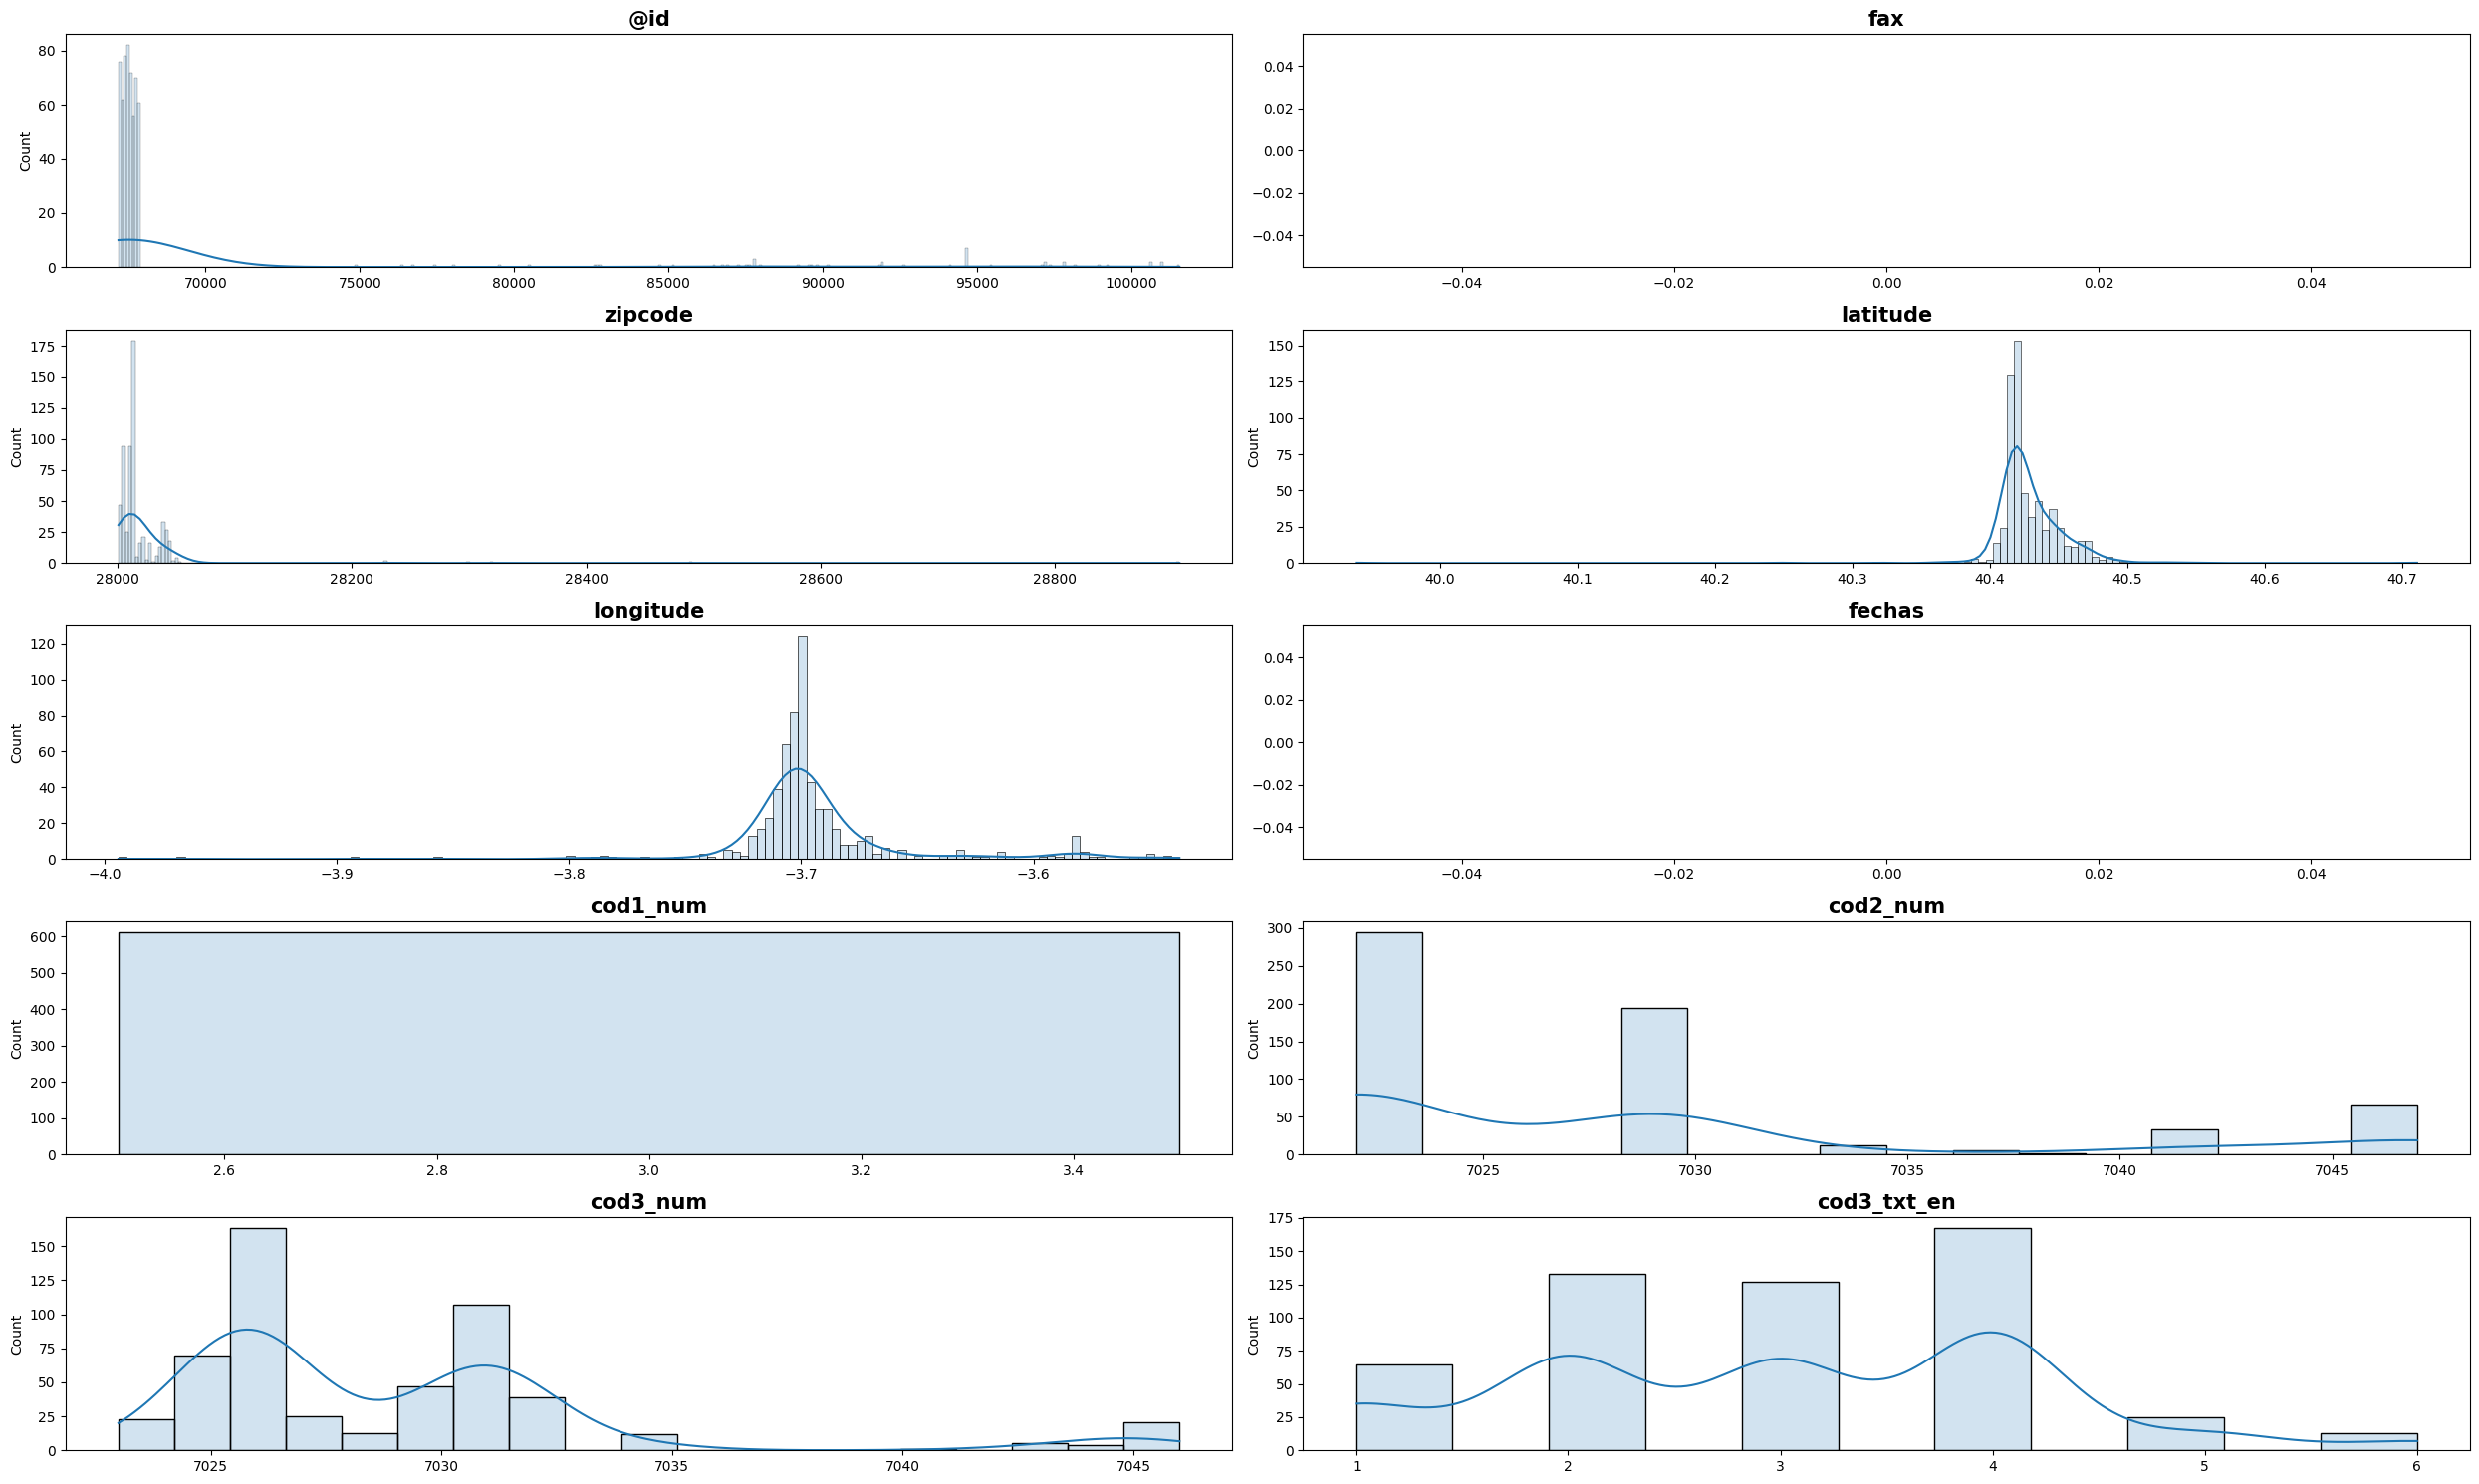

In [11]:
sch.distribucion_numericas(df_hoteles)

numeric variables distribution -> outliers


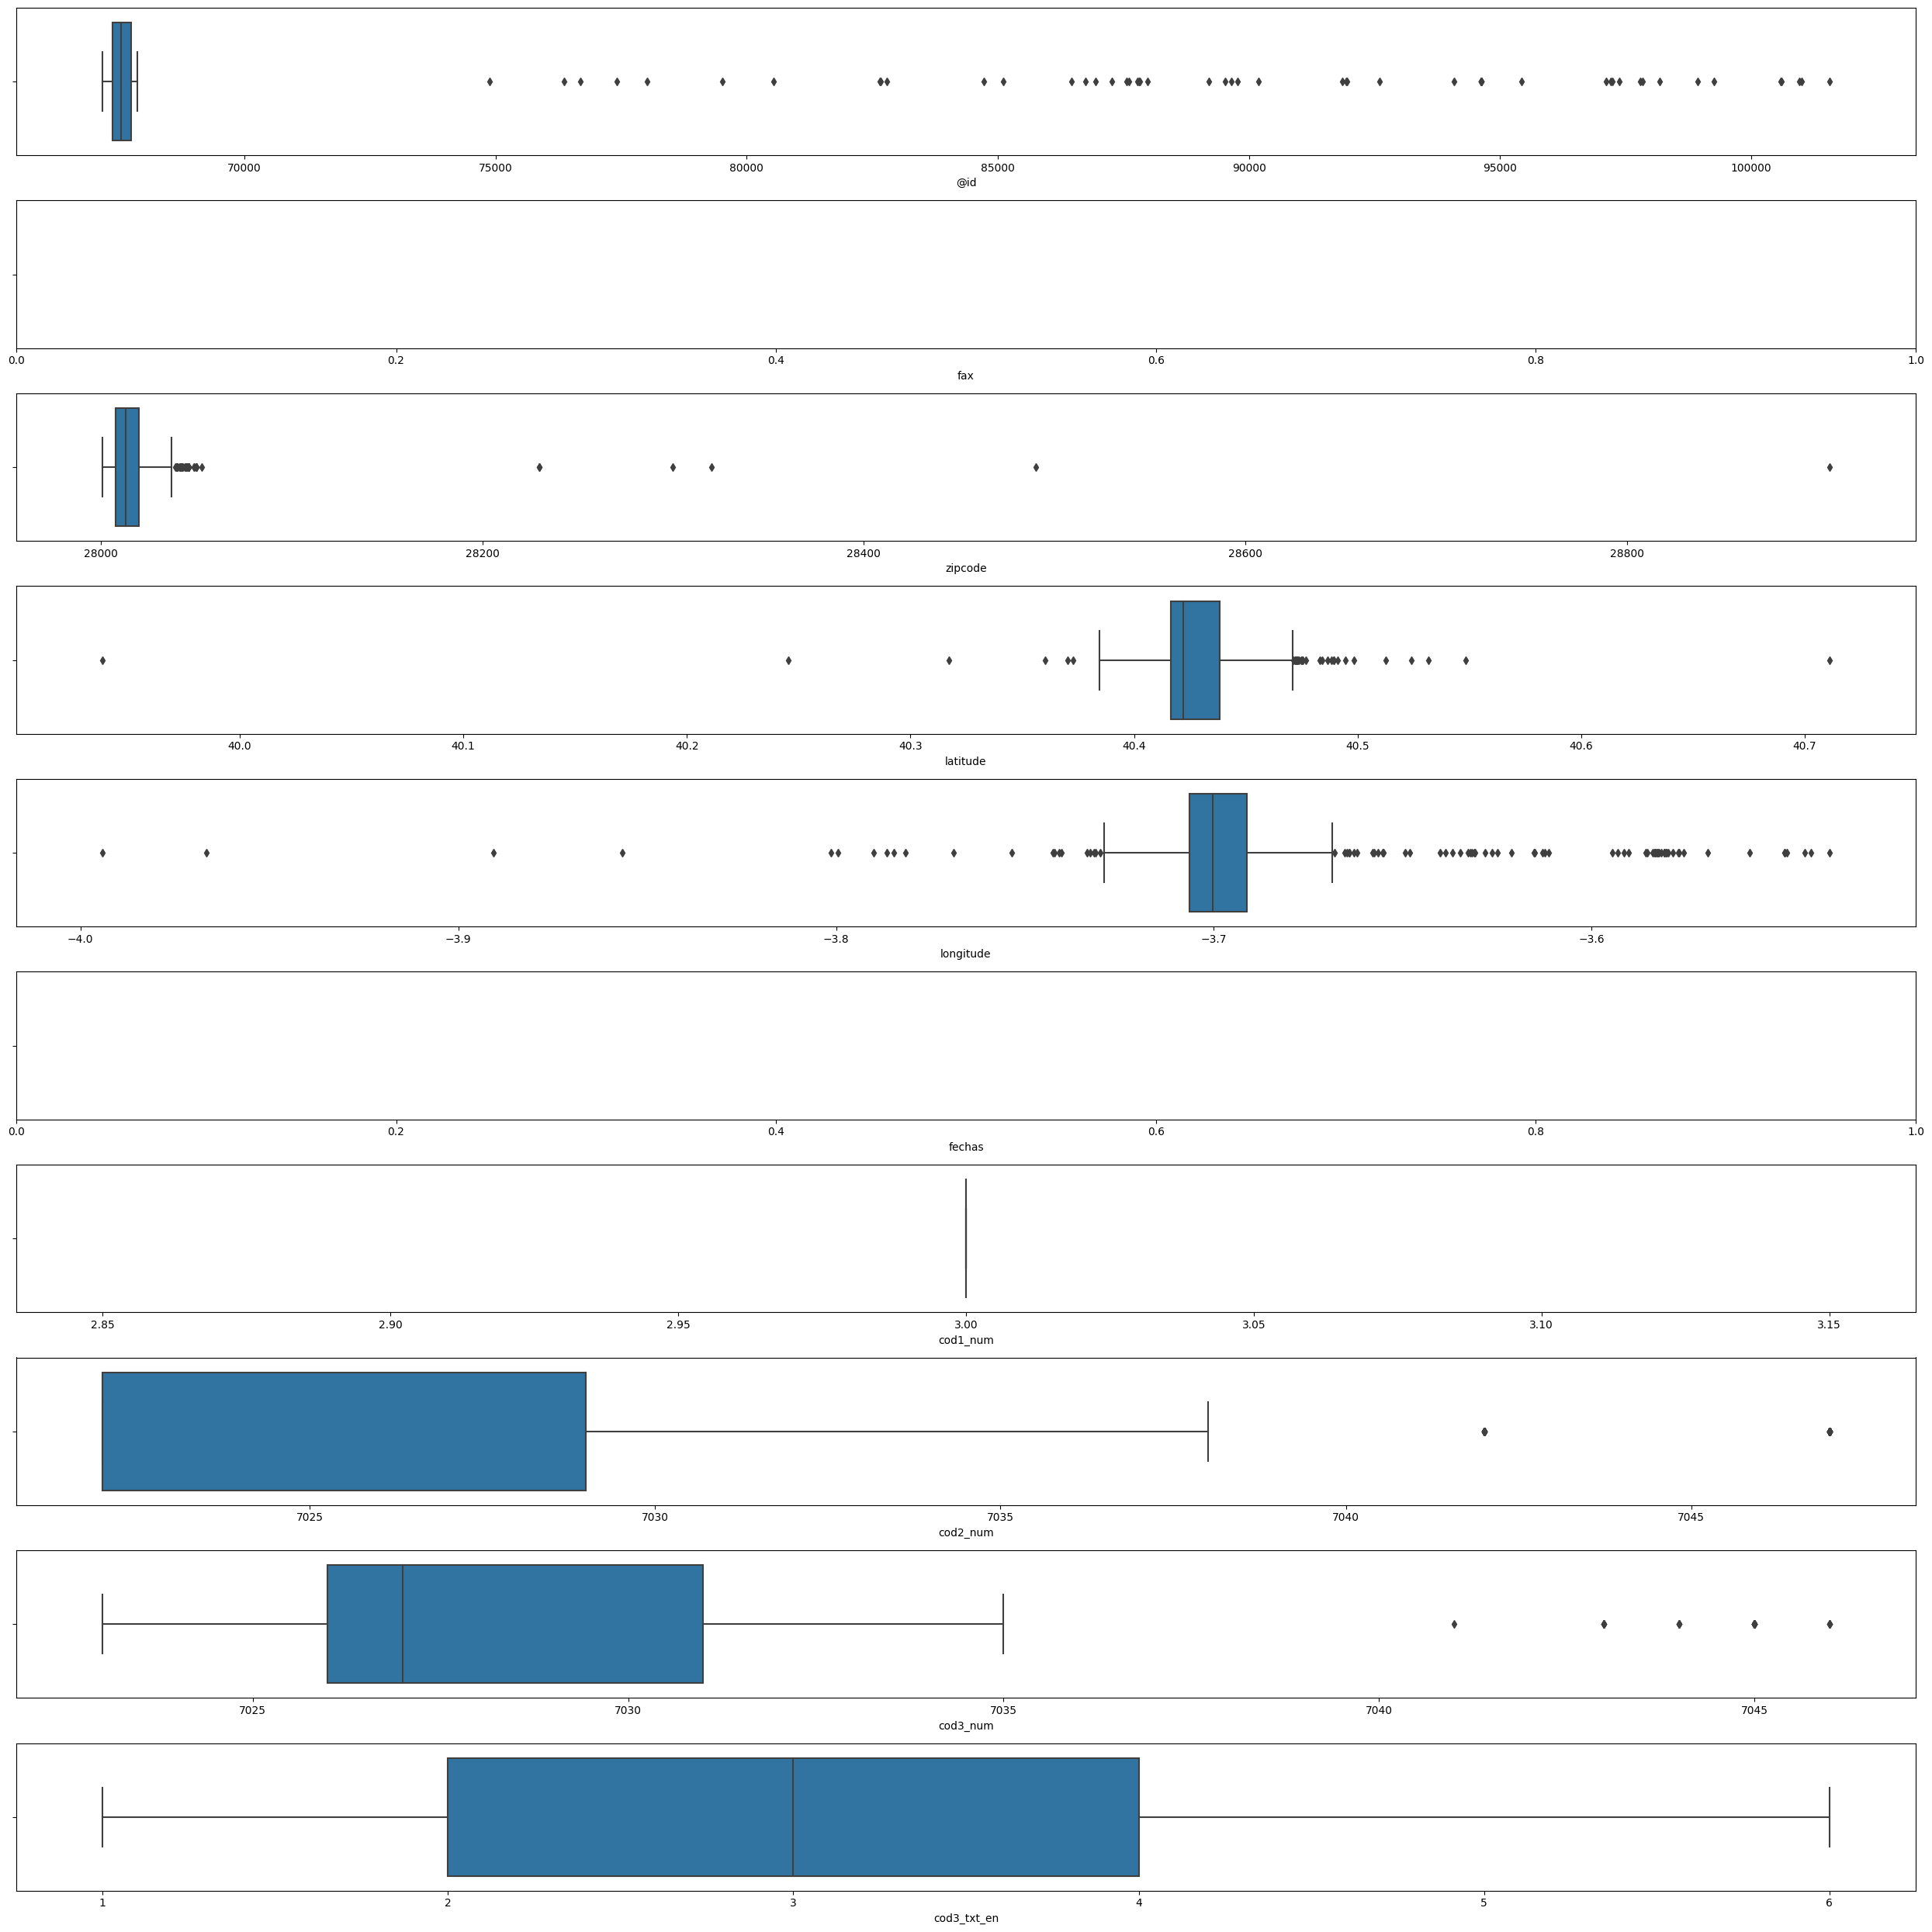

In [12]:
sch.chart_boxplot(df_hoteles)

In [13]:
sc.exportFiles(gdf_hoteles, df_hoteles, 'hotels')

# premises data census

In [14]:
with open('../data/ayto_madrid/ayto_madrid_df_actividades.pickle', 'rb') as f:
    df_actividades = pickle.load(f)
print(df_actividades.shape)
df_actividades.head(1)

(168649, 49)


,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,fx_carga,fx_datos_ini,fx_datos_fin,coordenada_x_agrupacion,coordenada_y_agrupacion
0,10000044,1,CENTRO,101,PALACIO,1,1014,14,439722.59,4473550.53,1,Puerta Calle,4,Cerrado,369700,CALLE,HUMILLADERO ...,11000878,1,NUM,16,,10,369700,CALLE,HUMILLADERO ...,11000878,1,NUM,16,,-1,SIN AGRUPACION,-1,SIN AGRUPACION,PB,,V.M. VINOMANIA,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...",472502,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...,2023-03-08T07:01:36,2023-03-01,2023-03-01,NaN,NaN


In [15]:
with open('../data/ayto_madrid/ayto_madrid_df_licencia.pickle', 'rb') as f:
    df_licencia = pickle.load(f)
print(df_licencia.shape)
df_licencia.head(1)

(145035, 49)


,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_ndp_acceso,id_clase_ndp_acceso,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,nom_acceso,num_acceso,cal_acceso,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,ref_licencia,id_tipo_licencia,desc_tipo_licencia,id_tipo_situacion_licencia,desc_tipo_situacion_licencia,Fecha_Dec_Lic,fx_carga,fx_datos_ini,fx_datos_fin,coordenada_x_agrupacion,coordenada_y_agrupacion
0,10001936,1,CENTRO,106,SOL,6,1121,121,439958.59,4474028.53,1,Puerta Calle,1,Abierto,11007699,1,743600,CALLE,TOLEDO ...,NUM,4,,10,11007699,1,743600,CALLE,TOLEDO ...,NUM,4,,-1,SIN AGRUPACION,-1,SIN AGRUPACION,PB,CT,CORRIENTES 348,500/2020/06644,1,Declaración Responsable,02,Concedida,12/04/2021,2023-03-08T07:01:04,2023-03-01,2023-03-01,NaN,NaN


In [16]:
with open('../data/ayto_madrid/ayto_madrid_df_local.pickle', 'rb') as f:
    df_local = pickle.load(f)
print(df_local.shape)
df_local.head(1)

(150638, 48)


,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,cod_postal,fx_carga,fx_datos_ini,fx_datos_fin,hora_apertura1,hora_cierre1,hora_apertura2,hora_cierre2,coordenada_x_agrupacion,coordenada_y_agrupacion
0,300007732,6,TETUAN,601,BELLAS VISTAS,1,6011,11,439965.5,4478510.5,1,Puerta Calle,4,Cerrado,553900,CALLE,OUDRID ...,11028424,1,NUM,23,,5,553900,CALLE,OUDRID ...,11028424,1,NUM,23,,-1,SIN AGRUPACION,-1,SIN AGRUPACION,PB,02,SIN ACTIVIDAD,28039,2023-03-08T07:02:21,2023-03-01,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
with open('../data/ayto_madrid/ayto_madrid_df_terrazas.pickle', 'rb') as f:
    df_terrazas = pickle.load(f)
print(df_terrazas.shape)
df_terrazas.head(1)

(6592, 61)


,id_terraza,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,id_ndp_edificio,id_clase_ndp_edificio,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,nom_edificio,num_edificio,Cod_Postal,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,secuencial_local_PC,Escalera,id_planta_agrupado,id_local_agrupado,rotulo,id_periodo_terraza,desc_periodo_terraza,id_situacion_terraza,desc_situacion_terraza,Superficie_ES,Fecha_confir_ult_decreto_resol,id_ndp_terraza,id_clase_ndp_terraza,id_vial,desc_clase,desc_nombre,nom_terraza,num_terraza,cal_terraza,desc_ubicacion_terraza,hora_ini_LJ_es,hora_fin_LJ_es,hora_ini_VS_es,hora_fin_VS_es,mesas_aux_es,mesas_es,sillas_es,cal_edificio,fx_carga,fx_datos_ini,fx_datos_fin,Superficie_RA,hora_ini_LJ_ra,hora_fin_LJ_ra,hora_ini_VS_ra,hora_fin_VS_ra,mesas_aux_ra,mesas_ra,sillas_ra,coordenada_x_agrupacion,coordenada_y_agrupacion
0,7,280067128,20,SAN BLAS-CANILLEJAS,2005,ROSAS,20157611,1,2443,CALLE,SOFIA ...,NUM,177,28022,448900.55,4474755.41,1,Puerta Calle,1,Abierto,10,,PB,02,OUTLET MOTO MADRID,2,Estacional,1,Abierta,7.2,24/03/2014,20157611,1,2443,CALLE,SOFIA ...,NUM,177,A,Acera,08:00:00,01:30:00,08:00:00,01:30:00,0,5,10,A,2023-03-08T07:01:53,2023-03-01,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
columns = df_licencia.columns.difference(df_local.columns).tolist() + ['id_local']
df = pd.merge(df_actividades, df_licencia[columns], on='id_local', indicator=True, how = 'left')
df['_merge'].value_counts()

both          174904
left_only      82077
right_only         0
Name: _merge, dtype: int64

In [19]:
df.drop(['_merge'], axis=1, inplace=True)
columns = df_local.columns.difference(df.columns).tolist() + ['id_local']
df = pd.merge(df, df_local[columns], on='id_local', indicator=True, how='inner')
df['_merge'].value_counts()

both          256981
left_only          0
right_only         0
Name: _merge, dtype: int64

In [20]:
df.drop(['_merge'], axis=1, inplace=True)
columns = df_terrazas.columns.difference(df.columns).tolist() + ['id_local']
df = pd.merge(df, df_terrazas[columns], on='id_local', indicator=True, how='left')
df['_merge'].value_counts()

left_only     238095
both           18886
right_only         0
Name: _merge, dtype: int64

mapeo de los locales según el caso de estudio -> licencias
<br>mirar si las coordenadas valen -> reporyectar a 4326

In [21]:
df.head(1)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,fx_carga,fx_datos_ini,fx_datos_fin,coordenada_x_agrupacion,coordenada_y_agrupacion,Fecha_Dec_Lic,desc_tipo_licencia,desc_tipo_situacion_licencia,id_tipo_licencia,id_tipo_situacion_licencia,ref_licencia,cod_postal,hora_apertura1,hora_apertura2,hora_cierre1,hora_cierre2,Cod_Postal,Escalera,Fecha_confir_ult_decreto_resol,Superficie_ES,Superficie_RA,cal_terraza,desc_clase,desc_nombre,desc_periodo_terraza,desc_situacion_terraza,desc_ubicacion_terraza,hora_fin_LJ_es,hora_fin_LJ_ra,hora_fin_VS_es,hora_fin_VS_ra,hora_ini_LJ_es,hora_ini_LJ_ra,hora_ini_VS_es,hora_ini_VS_ra,id_clase_ndp_terraza,id_ndp_terraza,id_periodo_terraza,id_situacion_terraza,id_terraza,id_vial,mesas_aux_es,mesas_aux_ra,mesas_es,mesas_ra,nom_terraza,num_terraza,sillas_es,sillas_ra,_merge
0,10000044,1,CENTRO,101,PALACIO,1,1014,14,439722.59,4473550.53,1,Puerta Calle,4,Cerrado,369700,CALLE,HUMILLADERO ...,11000878,1,NUM,16,,10,369700,CALLE,HUMILLADERO ...,11000878,1,NUM,16,,-1,SIN AGRUPACION,-1,SIN AGRUPACION,PB,,V.M. VINOMANIA,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHÍCULOS DE...",472502,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...,2023-03-08T07:01:36,2023-03-01,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [22]:
df['desc_seccion'].value_counts()

COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS DE MOTOR Y MOTOCICLETAS     83080
HOSTELERÍA                                                                                49454
VALOR NULO EN ORIGEN                                                                      39077
OTROS SERVICIOS                                                                           23553
ACTIVIDADES SANITARIAS Y DE SERVICIOS SOCIALES                                             8932
EDUCACIÓN                                                                                  8634
ACTIVIDADES ADMINISTRATIVAS Y SERVICIOS AUXLIARES                                          6715
ACTIVIDADES ARTÍSTICAS, RECREATIVAS Y DE ENTRETENIMIENTO                                   6335
TRANSPORTE Y ALMACENAMIENTO                                                                4751
SIN ACTIVIDAD                                                                              4509
ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y

In [ ]:
df['desc_division'].unique()

this variables come from the census of business premises of the Ayuntamiento de Madrid. This counts for the businesses that are 200 m from the grid center:
- `'local200_n_shops24h'` -> number of shops that open 24h (more like the 7-11 shops)
- `'local200_n_shops'` -> number of regular shops
- `'local200_n_prox_fresco'` -> number of shops that sell fresh produce, such as fruit shops or fishmonger.
- `'local200_n_prox_supers'` -> number of supermarkets
- `'local200_n_epigrafes'` -> 
- `'local200_n_alquillercoche'` -> number of car rentals
- `'local200_n_prox_alcohol'` -> numer of licquor shops
- `'local200_n_fiesta'` ->
- `'local200_n_prox_noalim'` -> number of stores that don't sell food
- `'local200_n_alojamiento'` -> number of accomodations
- `'local200_n_prox_educacion'` -> number of nearby  schools
- `'local200_n_vacios'` -> number of empty premises
- `'local200_n_locutoris'` -> number of callshops
- `'local200_n_restaurants'` -> number of restaurants
- `'local200_n_desconocidos'` -> number of unkonw or not classified locations
- `'local200_n_prox_pastelerias'` -> number of bakeries
- `'local200_n_prox_supersbig'` -> numberr of hypermarkets / superstores
- `'local200_n_agrupaciones'` -> total number of multi purpose premises
- `'local200_n_locales'` -> total number of premises on one area
- `'local200_n_sex'` -> total number of sexshops

In [ ]:
df['desc_epigrafe'].unique()